# 1. Load ata & data understanding

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [2]:
# Load the excel dataset given
data = pd.read_excel('loan_default_data.xlsx')

In [3]:
# Show the first few rows of the data
data.head()

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,...,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,2007-01-01,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2013-08-01,2016-06-01,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,NaT,2012-03-01,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,NaT,2014-03-01,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,NaT,2016-06-01,0


In [4]:
data.shape #(row,column)

(38480, 37)

In [5]:
# Show basic statistics like average and count
data.describe() 

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,issue_date,...,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,next_payment_date,last_credit_pull_date,repay_fail
count,38480.000000,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480,...,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38409,38479.000000,3383,38477,38480.000000
mean,19240.500000,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,2010-09-28 14:41:01.621621760,...,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2013-02-26 23:29:26.679684608,2614.441757,2012-11-23 02:39:11.758793984,2014-09-01 20:43:31.139122176,0.151481
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,1999-12-01 00:00:00,...,1.000000,0.000000,0.000000,0.000000,0.000000,1999-01-01 00:00:00,0.000000,1999-01-01 00:00:00,1999-01-01 00:00:00,0.000000
25%,9620.750000,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,2010-04-01 00:00:00,...,13.000000,5463.099238,4811.735000,4400.000000,657.700000,2012-02-01 00:00:00,212.010000,2011-01-01 00:00:00,2013-05-01 00:00:00,0.000000
50%,19240.500000,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,2011-01-01 00:00:00,...,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,2013-03-01 00:00:00,526.000000,2012-04-01 00:00:00,2015-03-01 00:00:00,0.000000
75%,28860.250000,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,2011-08-01 00:00:00,...,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,2014-05-01 00:00:00,3169.815000,2016-07-01 00:00:00,2016-06-01 00:00:00,0.000000
max,38480.000000,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,2011-12-01 00:00:00,...,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,2016-06-01 00:00:00,36115.200000,2016-07-01 00:00:00,2016-06-01 00:00:00,1.000000
std,11108.363516,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,NaN,...,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,NaN,4391.969583,NaN,NaN,0.358522


In [6]:
# Show info about the data like column names and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     38480 non-null  int64         
 1   id                             38480 non-null  int64         
 2   member_id                      38480 non-null  int64         
 3   loan_amount                    38479 non-null  float64       
 4   funded_amount                  38479 non-null  float64       
 5   funded_amount_investors        38479 non-null  float64       
 6   term                           38480 non-null  object        
 7   interest_rate                  38480 non-null  float64       
 8   installment                    38479 non-null  float64       
 9   employment_length              37487 non-null  object        
 10  home_ownership                 38480 non-null  object        
 11  annual_income  

## EDA

In [7]:
#remove unnecessary column
data2 = data[[#'Unnamed: 0', 'id', 'member_id',
                'loan_amount', 
            #'funded_amount','funded_amount_investors', 'term', 
                'interest_rate', 
            #'installment',
                'employment_length', 'home_ownership', 'annual_income','verification_status', 
            #'issue_date', 
                'loan_status', 'purpose',
            #'zip_code', 'address_state', 
                'debt_to_income_ratio','no_delinquency_2yrs', 
            #'earliest_credit_line', 
                'inquiries_last_6mths','months_since_last_delinquency', 'no_open_accounts', 'public_records',
                'revolving_balance', 'revolving_utillization', 'no_total_account',
            #'total_payment', 'total_payment_investors', 'total_received_principal','total_received_interest', 
            #'last_payment_date', 
                'last_payment_amnt',
            #'next_payment_date', 
                'last_credit_pull_date','repay_fail']]

In [8]:
data2

,loan_amount,interest_rate,employment_length,home_ownership,annual_income,verification_status,loan_status,purpose,debt_to_income_ratio,no_delinquency_2yrs,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,last_payment_amnt,last_credit_pull_date,repay_fail
0,0.0,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,0.00,0.0,0.0,NaN,0.0,0.0,0.0,“0.00%”,1.0,0.00,2007-01-01,1
1,2500.0,13.98,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,19.86,0.0,5.0,NaN,7.0,0.0,981.0,0.213,10.0,90.85,2016-06-01,0
2,5000.0,15.95,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,175.67,2012-03-01,1
3,7000.0,9.91,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,1550.27,2014-03-01,0
4,2000.0,5.42,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,3.60,0.0,0.0,72.0,7.0,0.0,0.0,0,15.0,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,11.99,3 years,RENT,74250.0,Verified,Fully Paid,credit_card,22.17,0.0,2.0,NaN,12.0,0.0,16550.0,0.735,22.0,100.30,2016-06-01,0
38476,10400.0,13.49,9 years,RENT,62000.0,Source Verified,Fully Paid,credit_card,11.57,0.0,1.0,NaN,21.0,0.0,16898.0,0.397,33.0,393.08,2016-06-01,0
38477,16000.0,14.96,10+ years,MORTGAGE,95088.0,Source Verified,Fully Paid,debt_consolidation,10.63,0.0,1.0,NaN,9.0,1.0,10386.0,0.622,25.0,5439.96,2016-02-01,0
38478,10000.0,16.89,1 year,RENT,48720.0,Not Verified,Fully Paid,debt_consolidation,18.97,0.0,2.0,NaN,8.0,0.0,7301.0,0.533,12.0,380.63,2015-09-01,0


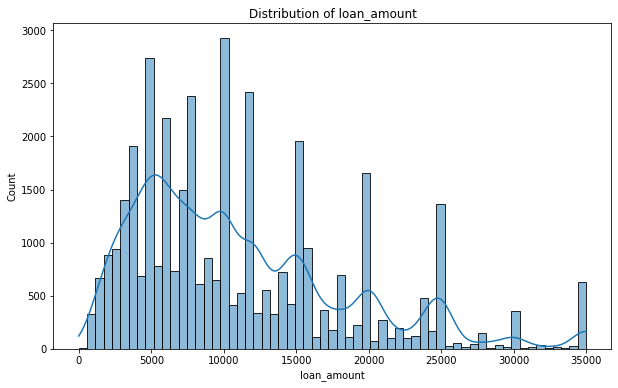

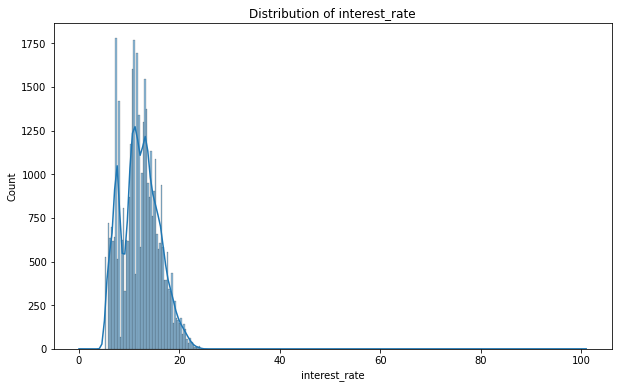

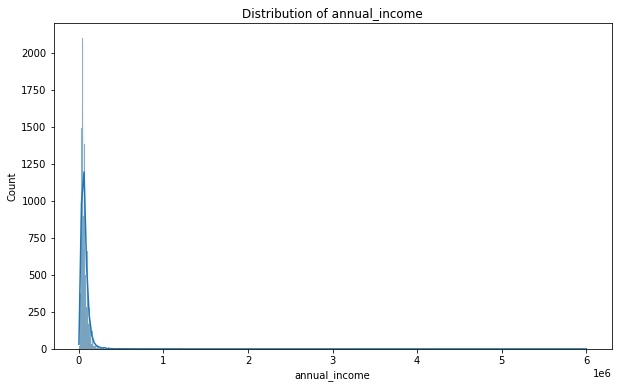

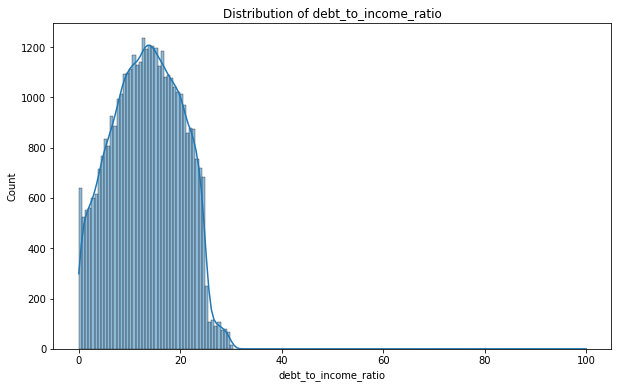

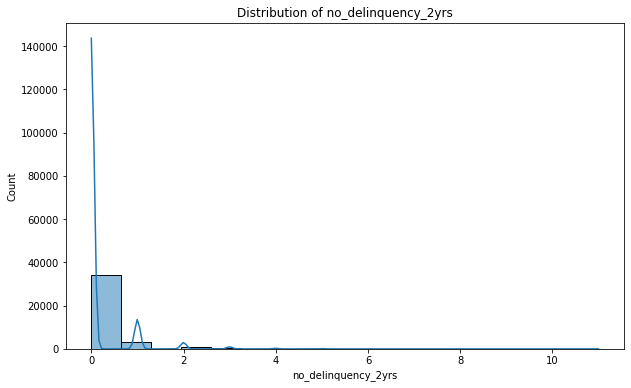

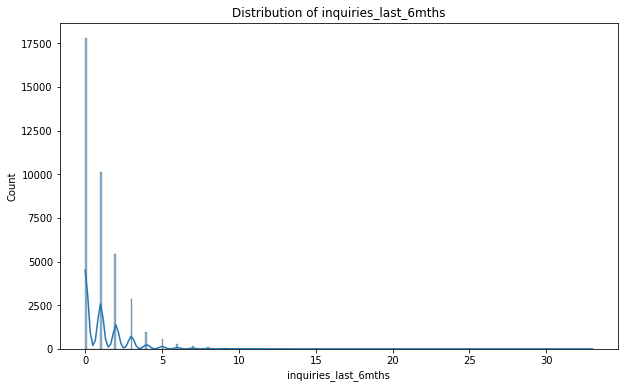

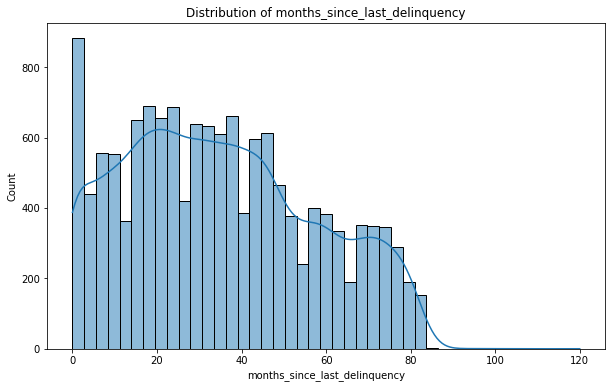

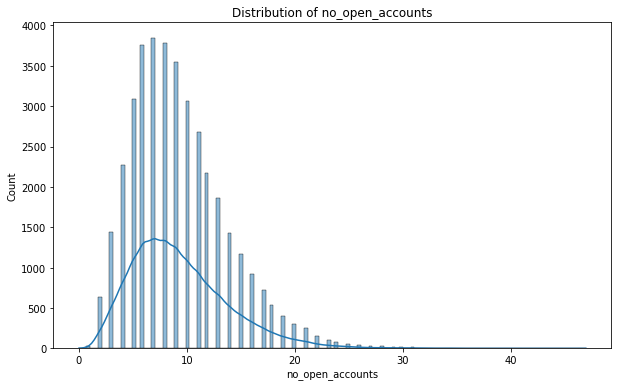

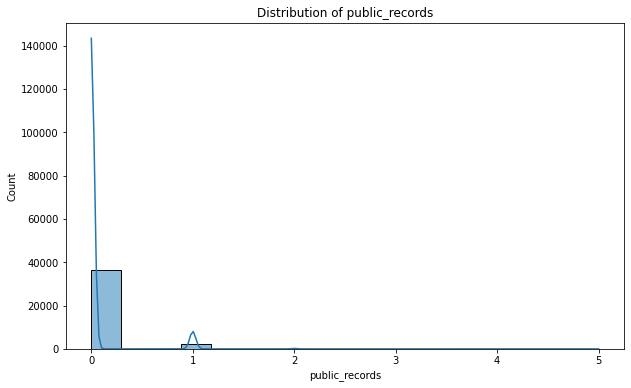

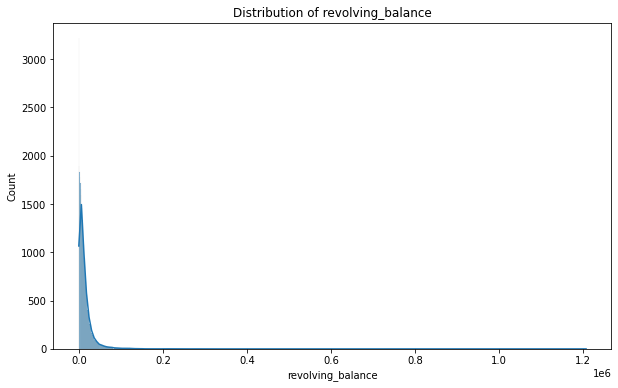

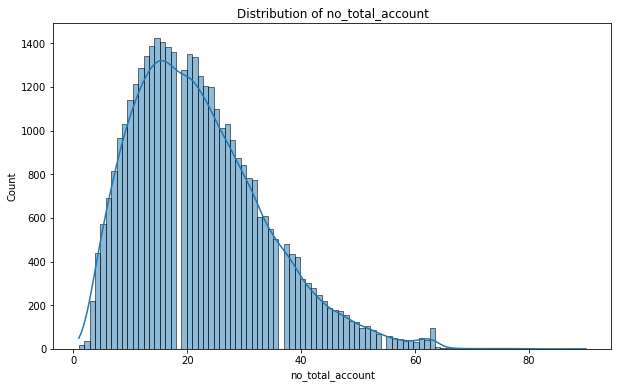

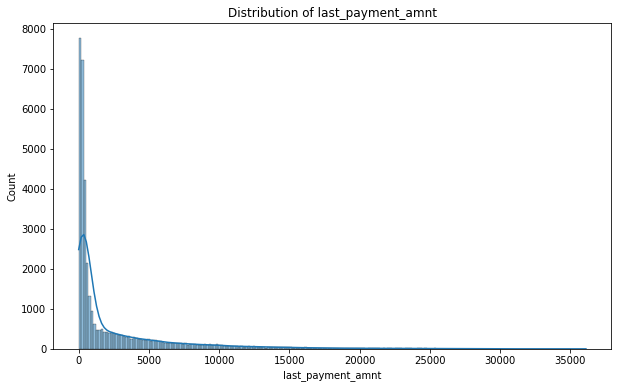

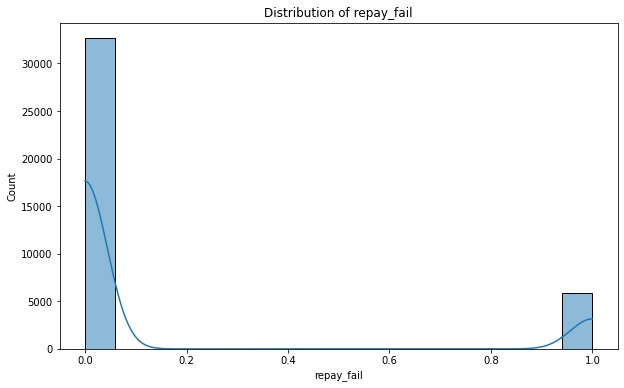

In [9]:
# EDA: Visualize distributions of numerical features
numerical_features = data2.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))  # Create a figure for the chart
    sns.histplot(data2[feature], kde=True)  # Plot a histogram with a smooth line
    plt.title(f'Distribution of {feature}')  # Give the chart a title
    plt.show()  # Display the chart
    

In [10]:
data2.dtypes

loan_amount                             float64
interest_rate                           float64
employment_length                        object
home_ownership                           object
annual_income                           float64
verification_status                      object
loan_status                              object
purpose                                  object
debt_to_income_ratio                    float64
no_delinquency_2yrs                     float64
inquiries_last_6mths                    float64
months_since_last_delinquency           float64
no_open_accounts                        float64
public_records                          float64
revolving_balance                       float64
revolving_utillization                   object
no_total_account                        float64
last_payment_amnt                       float64
last_credit_pull_date            datetime64[ns]
repay_fail                                int64
dtype: object

In [11]:
# Select only numerical columns
numeric_columns = data2.select_dtypes(include=['float64','int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Display correlation matrix
correlation_matrix

,loan_amount,interest_rate,annual_income,debt_to_income_ratio,no_delinquency_2yrs,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,no_total_account,last_payment_amnt,repay_fail
loan_amount,1.000000,0.290629,0.276860,0.063050,-0.031784,-0.033534,0.022919,0.177081,-0.052603,0.253138,0.257177,0.446277,0.042252
interest_rate,0.290629,1.000000,0.055257,0.126543,0.155343,0.177872,-0.052537,0.026252,0.099509,0.083907,-0.030326,0.145040,0.199220
annual_income,0.276860,0.055257,1.000000,-0.114748,0.024784,0.025544,0.000689,0.167093,-0.016984,0.276663,0.244050,0.139313,-0.037959
debt_to_income_ratio,0.063050,0.126543,-0.114748,1.000000,-0.036413,0.015098,0.062993,0.298959,-0.002154,0.194272,0.240211,0.001365,0.042096
no_delinquency_2yrs,-0.031784,0.155343,0.024784,-0.036413,1.000000,0.021092,-0.530208,0.015868,0.011775,-0.041232,0.070371,-0.012983,0.020481
inquiries_last_6mths,-0.033534,0.177872,0.025544,0.015098,0.021092,1.000000,-0.052536,0.093217,0.060919,0.008153,0.089740,-0.007559,0.111636
months_since_last_delinquency,0.022919,-0.052537,0.000689,0.062993,-0.530208,-0.052536,1.000000,0.032343,0.058942,-0.007537,0.035897,0.020560,-0.017414
no_open_accounts,0.177081,0.026252,0.167093,0.298959,0.015868,0.093217,0.032343,1.000000,0.005335,0.258023,0.693699,0.075221,-0.006320
public_records,-0.052603,0.099509,-0.016984,-0.002154,0.011775,0.060919,0.058942,0.005335,1.000000,-0.050693,-0.013698,-0.034231,0.050888
revolving_balance,0.253138,0.083907,0.276663,0.194272,-0.041232,0.008153,-0.007537,0.258023,-0.050693,1.000000,0.274575,0.084989,0.018898


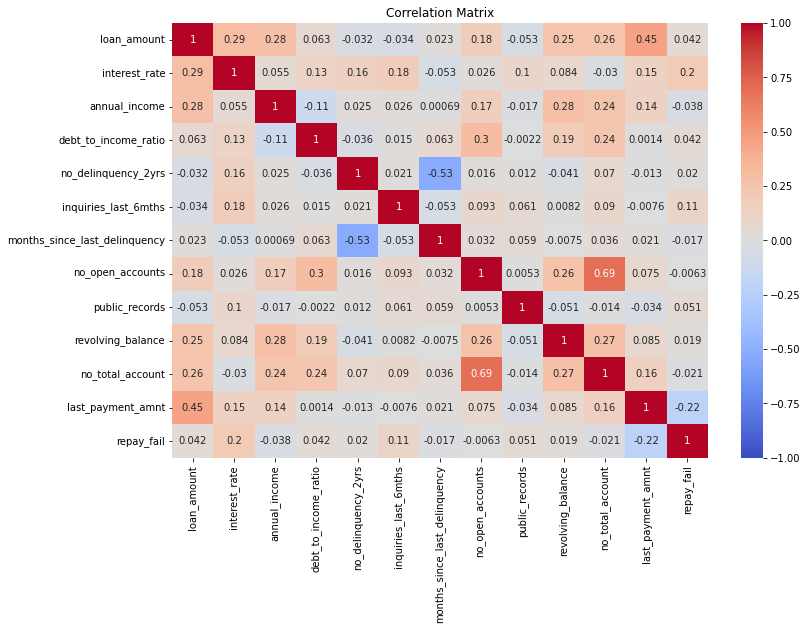

In [12]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing and Feature Engineering
### 1. Handle missing values

In [13]:
data2.isnull().sum()

loan_amount                          1
interest_rate                        0
employment_length                  993
home_ownership                       0
annual_income                        2
verification_status                  0
loan_status                          0
purpose                              0
debt_to_income_ratio                 0
no_delinquency_2yrs                  1
inquiries_last_6mths                 1
months_since_last_delinquency    24363
no_open_accounts                     1
public_records                       1
revolving_balance                    4
revolving_utillization              59
no_total_account                     1
last_payment_amnt                    1
last_credit_pull_date                3
repay_fail                           0
dtype: int64

In [14]:
# Handle missing values
data2.fillna(method='ffill', inplace=True)  # Fill missing values with the value from the row above

<ipython-input-14-ebe3065c74c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.fillna(method='ffill', inplace=True)  # Fill missing values with the value from the row above


In [15]:
data2.isnull().sum()

loan_amount                      0
interest_rate                    0
employment_length                0
home_ownership                   0
annual_income                    0
verification_status              0
loan_status                      0
purpose                          0
debt_to_income_ratio             0
no_delinquency_2yrs              0
inquiries_last_6mths             0
months_since_last_delinquency    2
no_open_accounts                 0
public_records                   0
revolving_balance                0
revolving_utillization           0
no_total_account                 0
last_payment_amnt                0
last_credit_pull_date            0
repay_fail                       0
dtype: int64

In [16]:
# view where the missing value in the dataframe
missing_values_MSLD = data2[data2['months_since_last_delinquency'].isnull()]
missing_values_MSLD

,loan_amount,interest_rate,employment_length,home_ownership,annual_income,verification_status,loan_status,purpose,debt_to_income_ratio,no_delinquency_2yrs,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,last_payment_amnt,last_credit_pull_date,repay_fail
0,0.0,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,0.00,0.0,0.0,NaN,0.0,0.0,0.0,“0.00%”,1.0,0.00,2007-01-01,1
1,2500.0,13.98,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,19.86,0.0,5.0,NaN,7.0,0.0,981.0,0.213,10.0,90.85,2016-06-01,0


In [17]:
# Create an imputer for the 'months_since_last_delinquency' column to hadle the missing value
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the column
data2['months_since_last_delinquency'] = imputer.fit_transform(data2[['months_since_last_delinquency']])

# Check if there are any remaining null values
print(data2['months_since_last_delinquency'].isnull().sum())

0


<ipython-input-17-5ad13898c197>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['months_since_last_delinquency'] = imputer.fit_transform(data2[['months_since_last_delinquency']])


In [18]:
data2.isnull().sum()

loan_amount                      0
interest_rate                    0
employment_length                0
home_ownership                   0
annual_income                    0
verification_status              0
loan_status                      0
purpose                          0
debt_to_income_ratio             0
no_delinquency_2yrs              0
inquiries_last_6mths             0
months_since_last_delinquency    0
no_open_accounts                 0
public_records                   0
revolving_balance                0
revolving_utillization           0
no_total_account                 0
last_payment_amnt                0
last_credit_pull_date            0
repay_fail                       0
dtype: int64

### 2. Change all datatype to numerical

In [19]:
# from sklearn.preprocessing import LabelEncoder

# Convert 'last_credit_pull_date' to datetime
data2['last_credit_pull_date'] = pd.to_datetime(data2['last_credit_pull_date'])

# List of columns to encode
categorical_features = data2.select_dtypes(include=['object']).columns

# Convert all categorical feature values to strings (if necessary)
for feature in categorical_features:
    data2[feature] = data2[feature].astype(str)

# Apply LabelEncoder to categorical features
le = LabelEncoder()
for feature in categorical_features:
    data2[feature] = le.fit_transform(data2[feature])

# Optionally extract features from datetime columns
data2['last_credit_pull_year'] = data2['last_credit_pull_date'].dt.year
data2['last_credit_pull_month'] = data2['last_credit_pull_date'].dt.month
data2.drop('last_credit_pull_date', axis=1, inplace=True)

<ipython-input-19-fbf96f6b44a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['last_credit_pull_date'] = pd.to_datetime(data2['last_credit_pull_date'])
<ipython-input-19-fbf96f6b44a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[feature] = data2[feature].astype(str)
<ipython-input-19-fbf96f6b44a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [20]:
data2

,loan_amount,interest_rate,employment_length,home_ownership,annual_income,verification_status,loan_status,purpose,debt_to_income_ratio,no_delinquency_2yrs,...,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,last_payment_amnt,repay_fail,last_credit_pull_year,last_credit_pull_month
0,0.0,0.00,10,4,0.0,0,0,6,0.00,0.0,...,33.0,0.0,0.0,0.0,1107,1.0,0.00,1,2007,1
1,2500.0,13.98,4,4,20004.0,0,4,9,19.86,0.0,...,33.0,7.0,0.0,981.0,251,10.0,90.85,0,2016,6
2,5000.0,15.95,4,4,59000.0,0,0,2,19.57,0.0,...,59.0,7.0,0.0,18773.0,1086,15.0,175.67,1,2012,3
3,7000.0,9.91,1,0,53796.0,0,5,9,10.80,3.0,...,3.0,7.0,0.0,3269.0,543,20.0,1550.27,0,2014,3
4,2000.0,5.42,1,4,30000.0,0,5,2,3.60,0.0,...,72.0,7.0,0.0,0.0,0,15.0,53.12,0,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,11.99,3,4,74250.0,2,5,1,22.17,0.0,...,43.0,12.0,0.0,16550.0,819,22.0,100.30,0,2016,6
38476,10400.0,13.49,9,4,62000.0,1,5,1,11.57,0.0,...,43.0,21.0,0.0,16898.0,463,33.0,393.08,0,2016,6
38477,16000.0,14.96,1,0,95088.0,1,5,2,10.63,0.0,...,43.0,9.0,1.0,10386.0,701,25.0,5439.96,0,2016,2
38478,10000.0,16.89,0,4,48720.0,0,5,2,18.97,0.0,...,43.0,8.0,0.0,7301.0,608,12.0,380.63,0,2015,9


### 3. Feature Scaling

In [21]:
# include all column that in different range to standardise the feature 
cols = ['loan_amount', 'interest_rate', 'employment_length', 'home_ownership',
       'annual_income', 'verification_status', 'loan_status', 'purpose',
       'debt_to_income_ratio', 'no_delinquency_2yrs', 'inquiries_last_6mths',
       'months_since_last_delinquency', 'no_open_accounts', 'public_records',
       'revolving_balance', 'revolving_utillization', 'no_total_account',
       'last_payment_amnt', 'last_credit_pull_year',
       'last_credit_pull_month']

In [22]:
# Feature scaling
scaler = StandardScaler()  # Create a scaler to make numbers easier to compare
data2[cols] = scaler.fit_transform(data2[cols])  # Scale the numbers

# Display the cleaned data
print(data2.head())  

   loan_amount  interest_rate  employment_length  home_ownership  \
0    -1.498233      -3.254756           1.844191        0.964831   
1    -1.160633       0.485820          -0.007193        0.964831   
2    -0.823034       1.012926          -0.007193        0.964831   
3    -0.552954      -0.603175          -0.932885       -1.104085   
4    -1.228153      -1.804547          -0.932885        0.964831   

   annual_income  verification_status  loan_status   purpose  \
0      -1.070120            -1.016639    -2.362452  0.616271   
1      -0.759858            -1.016639    -0.094026  1.492463   
2      -0.155032            -1.016639    -2.362452 -0.551984   
3      -0.235746            -1.016639     0.473080  1.492463   
4      -0.604821            -1.016639     0.473080 -0.551984   

   debt_to_income_ratio  no_delinquency_2yrs  ...  \
0             -1.983628            -0.299309  ...   
1              0.961095            -0.299309  ...   
2              0.918095            -0.299309  .

<ipython-input-22-77966dc46673>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[cols] = scaler.fit_transform(data2[cols])  # Scale the numbers


In [23]:
data2 

,loan_amount,interest_rate,employment_length,home_ownership,annual_income,verification_status,loan_status,purpose,debt_to_income_ratio,no_delinquency_2yrs,...,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,last_payment_amnt,repay_fail,last_credit_pull_year,last_credit_pull_month
0,-1.498233,-3.254756,1.844191,0.964831,-1.070120,-1.016639,-2.362452,0.616271,-1.983628,-0.299309,...,-0.096010,-2.077107,-0.235653,-0.651288,1.803264,-1.821445,-0.595279,1,-3.881030,-1.752809
1,-1.160633,0.485820,-0.007193,0.964831,-0.759858,-1.016639,-0.094026,1.492463,0.961095,-0.299309,...,-0.096010,-0.520864,-0.235653,-0.606575,-0.989780,-1.044822,-0.574593,0,0.942783,-0.050322
2,-0.823034,1.012926,-0.007193,0.964831,-0.155032,-1.016639,-2.362452,-0.551984,0.918095,-0.299309,...,1.057194,-0.520864,-0.235653,0.204361,1.734743,-0.613365,-0.555280,1,-1.201134,-1.071814
3,-0.552954,-0.603175,-0.932885,-1.104085,-0.235746,-1.016639,0.473080,1.492463,-0.382268,5.611099,...,-1.426630,-0.520864,-0.235653,-0.502291,-0.037012,-0.181907,-0.242292,0,-0.129175,-1.071814
4,-1.228153,-1.804547,-0.932885,0.964831,-0.604821,-1.016639,0.473080,-0.551984,-1.449841,-0.299309,...,1.633796,-0.520864,-0.235653,-0.651288,-1.808768,-0.613365,-0.583184,0,0.942783,-0.050322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,-1.093113,-0.046637,-0.315757,0.964831,0.081495,1.305866,0.473080,-0.844048,1.303608,-0.299309,...,0.347530,0.590738,-0.235653,0.103040,0.863549,-0.009324,-0.572441,0,0.942783,-0.050322
38476,-0.093819,0.354713,1.535627,0.964831,-0.108502,0.144613,0.473080,-0.844048,-0.268097,-0.299309,...,0.347530,2.591622,-0.235653,0.118901,-0.298045,0.939882,-0.505777,0,0.942783,-0.050322
38477,0.662404,0.748035,-0.932885,-1.104085,0.404692,0.144613,0.473080,-0.551984,-0.407475,-0.299309,...,0.347530,-0.076223,3.834334,-0.177908,0.478526,0.249550,0.643365,0,0.942783,-1.412311
38478,-0.147835,1.264438,-1.241448,0.964831,-0.314474,-1.016639,0.473080,-0.551984,0.829131,-0.299309,...,0.347530,-0.298544,-0.235653,-0.318518,0.175076,-0.872239,-0.508612,0,0.406804,0.971169


# Machine Learning Models

In [24]:
# Define target variable and features
X = data2.drop('repay_fail', axis=1)
y = data2['repay_fail']

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    evaluate_model(model, X_train, X_test, y_train, y_test)
    print("\n")


Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6484
           1       0.91      0.94      0.92      1212

    accuracy                           0.98      7696
   macro avg       0.95      0.96      0.95      7696
weighted avg       0.98      0.98      0.98      7696

[[6368  116]
 [  76 1136]]
ROC AUC Score: 0.959701769066481


Evaluating Random Forest...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6484
           1       1.00      1.00      1.00      1212

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696

[[6484    0]
 [   6 1206]]
ROC AUC Score: 0.9975247524752475


Evaluating Support Vector Machine...
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6484
           1 

In [26]:
# Example of selecting the best model based on ROC AUC Score
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    score = roc_auc_score(y_test, model.predict(X_test))
    if score > best_score:
        best_model = model
        best_score = score

print(f"Best model: {best_model} with ROC AUC Score: {best_score}")


Best model: RandomForestClassifier() with ROC AUC Score: 1.0
